<style>
/* ── Global typography ── */
body { font-family: 'Segoe UI', Helvetica, Arial, sans-serif; }

/* ── Notebook header banner ── */
.nb-banner {
    background: linear-gradient(135deg, #FF0000 0%, #282828 100%);
    color: white;
    padding: 40px 30px;
    border-radius: 12px;
    margin-bottom: 30px;
    text-align: center;
    box-shadow: 0 6px 20px rgba(0,0,0,0.25);
}
.nb-banner h1 { font-size: 2.4em; margin: 0 0 10px 0; letter-spacing: 1px; }
.nb-banner p  { font-size: 1.1em; opacity: 0.9; margin: 0; }

/* ── Section cards ── */
.section-card {
    background: #f9f9f9;
    border-left: 6px solid #FF0000;
    border-radius: 8px;
    padding: 22px 28px;
    margin: 20px 0;
    box-shadow: 0 2px 8px rgba(0,0,0,0.06);
}
.section-card h2 { color: #282828; margin-top: 0; font-size: 1.5em; }
.section-card h3 { color: #444; }

/* ── Hypothesis banners ── */
.hypothesis {
    background: linear-gradient(90deg, #282828, #3d3d3d);
    color: #fff;
    padding: 18px 24px;
    border-radius: 8px;
    margin: 28px 0 16px 0;
}
.hypothesis .label {
    font-size: 0.75em; text-transform: uppercase; letter-spacing: 2px;
    color: #FF4444; margin-bottom: 6px;
}
.hypothesis h2 { margin: 0; font-size: 1.4em; }

/* ── Info boxes ── */
.info-box {
    background: #e8f4fd;
    border: 1px solid #b0d4f1;
    border-radius: 6px;
    padding: 14px 18px;
    margin: 14px 0;
    font-size: 0.95em;
}
.info-box.warning { background: #fff8e1; border-color: #ffe082; }
.info-box.success { background: #e8f5e9; border-color: #a5d6a7; }
.info-box.caveat  { background: #fce4ec; border-color: #f48fb1; }

/* ── TOC styling ── */
.toc {
    background: white;
    border: 2px solid #FF0000;
    border-radius: 10px;
    padding: 24px 32px;
    margin: 20px 0 30px 0;
}
.toc h2 { color: #FF0000; margin-top: 0; }
.toc ol  { margin: 0; padding-left: 22px; line-height: 2; }
.toc ol ol { list-style-type: lower-alpha; }
.toc a   { color: #282828; text-decoration: none; font-weight: 500; }
.toc a:hover { color: #FF0000; text-decoration: underline; }

/* ── Image display ── */
.nb-image {
    display: block;
    max-width: 100%;
    border-radius: 8px;
    margin: 16px auto;
    box-shadow: 0 4px 12px rgba(0,0,0,0.12);
}
.img-caption { text-align: center; font-size: 0.85em; color: #666; margin-top: 6px; }

/* ── Method badge ── */
.method-badge {
    display: inline-block;
    background: #FF0000;
    color: white;
    font-size: 0.75em;
    padding: 3px 10px;
    border-radius: 12px;
    font-weight: 600;
    text-transform: uppercase;
    letter-spacing: 0.5px;
    margin-right: 6px;
}
.assumption-list li { margin-bottom: 6px; }
</style>

<div class="nb-banner">
<h1>📺 Video Content Strategy</h1>
<p>A Statistical Analysis of YouTube Performance Drivers | Active vs Passive Content · Sentiment · Controversy</p>
</div>



<img src="https://bensonruan.com/wp-content/uploads/2023/09/Youtube-Sentiment-Analysis-feature.jpg" 
     alt="Sentiment Analysis Diagram" class="nb-image" style="max-height:320px; object-fit:contain;" />
<p class="img-caption">

<div class="toc">
<h2>📋 Table of Contents</h2>
<ol>
  <li><a href="#setup">Setup &amp; Imports</a></li>
  <li><a href="#h1">Hypothesis 1 — Active vs Passive Content</a>
    <ol>
      <li><a href="#h1-keywords">Keyword Classification (Models A, B, C)</a></li>
      <li><a href="#h1-normality">Normality &amp; Distribution Checks</a></li>
      <li><a href="#h1-mwu">Mann-Whitney U Test</a></li>
      <li><a href="#h1-ols">OLS Regression (Robustness Check)</a></li>
      <li><a href="#h1-summary">Summary Statistics</a></li>
    </ol>
  </li>
  <li><a href="#h2">Hypothesis 2 — Sentiment Quality Drives Longevity</a>
    <ol>
      <li><a href="#h2-data">Data Preparation</a></li>
      <li><a href="#h2-spearman">Spearman Correlation</a></li>
      <li><a href="#h2-cohorts">Sentiment Cohorts &amp; Kruskal-Wallis</a></li>
      <li><a href="#h2-robust">Robustness Checks (SWES, OLS)</a></li>
    </ol>
  </li>
  <li><a href="#h3">Hypothesis 3 — Non-Linear Controversy Effect</a>
    <ol>
      <li><a href="#h3-ccs">Comment Controversy Score (CCS)</a></li>
      <li><a href="#h3-kruskal">Kruskal-Wallis &amp; Cohort Tests</a></li>
      <li><a href="#h3-quadratic">Quadratic &amp; Interaction Models</a></li>
      <li><a href="#h3-stratification">Stratification by Sentiment</a></li>
    </ol>
  </li>
  <li><a href="#spotcheck">Spot-Checking &amp; Video Archetypes</a></li>
  <li><a href="#combos">Controversy × Sentiment Deep Dives</a></li>
</ol>
</div>

<div class="section-card" id="setup">
<h2>⚙️ 1. Setup &amp; Imports</h2>
<p>Standard scientific Python stack: <code>pandas</code> / <code>numpy</code> for data wrangling, <code>matplotlib</code> / <code>seaborn</code> for visualisation, <code>scipy.stats</code> for non-parametric tests, and <code>statsmodels</code> for OLS regression.</p>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, shapiro
import statsmodels.formula.api as smf
from scipy.stats import skew
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('C:/Users/debad/Downloads/YouTube Statistics_Kaggle Dataset/Hypothesis1_data.csv')

""" First, we separate the groups according to Model A,B and C.
    Then check Normality and Skewness Assumptions, which justify using Mann-Whitney U-Test. 
    Calculate Effect Size. Do an OLS regression on Log(Views per Day) as a robustness check. 
     Evaluate results across three models, Mann-Whitney Test and OLS Regression.   
"""

df["log_vpd"] = np.log1p(df["views_per_day"])

df.drop(columns=['consumption_type'], inplace=True)





<div class="hypothesis" id="h1">
<div class="label">Hypothesis 1</div>
<h2>🎓 Active vs Passive Content: Does Content Type Drive Views?</h2>
</div>

<div class="section-card">
<p><strong>Research Question:</strong> Do <em>actively consumed</em> videos (tutorials, how-tos, educational) attract more daily views than <em>passively consumed</em> videos (music, entertainment, reactions)?</p>

<img src="https://images.ctfassets.net/fi0zmnwlsnja/7zLIUE6xFHpB9dC7VpESmv/89d3a2289a94d1e0d5f97c0e5a20f2ac/active-learning-vs-passive-learning-2-1140x641.jpg" 
     alt="Active vs Passive Learning" class="nb-image" />
<p class="img-caption">Active vs. Passive content frameworks mirror active vs. passive learning paradigms.</p>

<p><strong>Strategy:</strong> Since &ldquo;ambiguous&rdquo; keywords (tech, news, gaming) could belong to either camp, we evaluate three classification models:</p>
<ul>
  <li><span class="method-badge">Model A</span> Ambiguous → Passive</li>
  <li><span class="method-badge">Model B</span> Ambiguous → Active</li>
  <li><span class="method-badge">Model C</span> Ambiguous → Excluded</li>
</ul>
</div>

<h3 id="h1-keywords">🗂️ 1.1 Keyword Classification</h3>
<p>Keywords are manually labelled as <strong>active</strong> (goal-directed learning) or <strong>passive</strong> (entertainment/relaxation). Ambiguous keywords are classified differently across the three models to test robustness.</p>

In [3]:
# Keyword Groups
active = [
    'how-to', 'tutorial', 'education', 'sat', 'mathchemistry',
    'biology', 'physics', 'computer science', 'data science',
    'machine learning', 'game development', 'finance',
    'crypto', 'business', 'history', 'literature',
    'interview', 'chess'
]

passive = [
    'music', 'asmr', 'lofi', 'mukbang', 'reaction',
    'animals', 'food', 'bed', 'mrbeast', 'marvel',
    'movies', 'nintendo', 'xbox', 'apple', 'google',
    'cnn', 'trolling', 'minecraft', 'sports', 'cubes'
]

ambiguous = ['tech', 'news', 'gaming']




In [4]:
# Classification functions for Model A, B and C
def model_A(keyword):
    if keyword in active:
        return "active"
    elif keyword in passive or keyword in ambiguous:
        return "passive"
    else:
        return None


def model_B(keyword):
    if keyword in passive:
        return "passive"
    elif keyword in active or keyword in ambiguous:
        return "active"
    else:
        return None


def model_C(keyword):
    if keyword in active:
        return "active"
    elif keyword in passive:
        return "passive"
    else:
        return None




In [5]:
# Applying the function
df["model_A"] = df["keyword"].apply(model_A)
df["model_B"] = df["keyword"].apply(model_B)
df["model_C"] = df["keyword"].apply(model_C)

df_C = df[df["model_C"].notna()]
df[df['views_per_day'] == 0]


title     video_id  \
1389  Mathematics and Chemistry : MathChemistry.com ...  TlEpQgYBS0E   
1392  Mathematics and Chemistry : MathChemistry.com ...  V_vguZj_7FE   

             published_at        keyword  likes  comments  views  \
1389  2013-04-15 00:00:00  mathchemistry      1         2     63   
1392  2013-04-15 00:00:00  mathchemistry      0         1     25   

      days_since_publication  like_to_view_perc  engagement_intensity  \
1389                    3418               1.59                  4.76   
1392                    3418               0.00                  4.00   

      views_per_day age_cohort  log_vpd model_A model_B model_C  
1389              0   90+ days      0.0  active  active  active  
1392              0   90+ days      0.0  active  active  active

<h3 id="h1-normality">📊 1.2 Distribution & Normality Checks</h3>
<div class="info-box">
  <strong>Why this matters:</strong> The choice between parametric (t-test) and non-parametric (Mann-Whitney U) tests depends on whether the data follows a normal distribution. We check this with histograms, KDE plots, skewness, and the Shapiro-Wilk test.
</div>


In [6]:
df.engagement_intensity.describe()

count    1878.000000
mean        3.717284
std         2.867561
min         0.010000
25%         1.740000
50%         3.040000
75%         4.860000
max        26.330000
Name: engagement_intensity, dtype: float64

<AxesSubplot:>

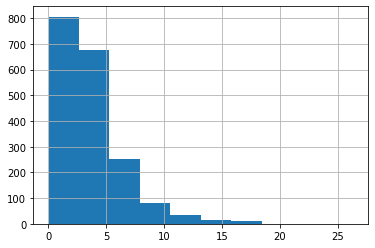

In [7]:
df.engagement_intensity.hist()

In [8]:

""" Distribution Visualizations + Normality Checks """


from scipy.stats import skew, shapiro

def analyze_distribution(data, label_col, model_name):
    groups = data[label_col].unique()

    # ---- HISTOGRAMS SIDE BY SIDE ----
    fig, axes = plt.subplots(1, len(groups), figsize=(12, 5), sharey=True)

    if len(groups) == 1:
        axes = [axes]  # ensure iterable

    for ax, group in zip(axes, groups):
        subset = data[data[label_col] == group]["views_per_day"]

        ax.hist(subset, bins=10)
        ax.set_title(f"{model_name} - {group}")
        ax.set_xlabel("Views per Day")
        ax.set_ylabel("Frequency")

    fig.suptitle(f"{model_name} - Histogram (VPD)", fontsize=14)
    plt.tight_layout()
    plt.show()

    # ---- KDE SIDE BY SIDE ----
    fig, axes = plt.subplots(1, len(groups), figsize=(12, 5), sharey=True)

    if len(groups) == 1:
        axes = [axes]

    for ax, group in zip(axes, groups):
        subset = data[data[label_col] == group]["views_per_day"]

        subset.plot(kind='kde', ax=ax)
        ax.set_title(f"{model_name} - {group}")
        ax.set_xlabel("Views per Day")

    fig.suptitle(f"{model_name} - KDE (PD)", fontsize=14)
    plt.tight_layout()
    plt.show()

    # ---- Stats ----
    for group in groups:
        subset = data[data[label_col] == group]["views_per_day"]

        print(f"{model_name} - {group} Skewness:", skew(subset))

        sample = subset.sample(min(5000, len(subset)), random_state=42)
        stat, p = shapiro(sample)
        print(f"{model_name} - {group} Shapiro p-value:", p)
        print("-----")




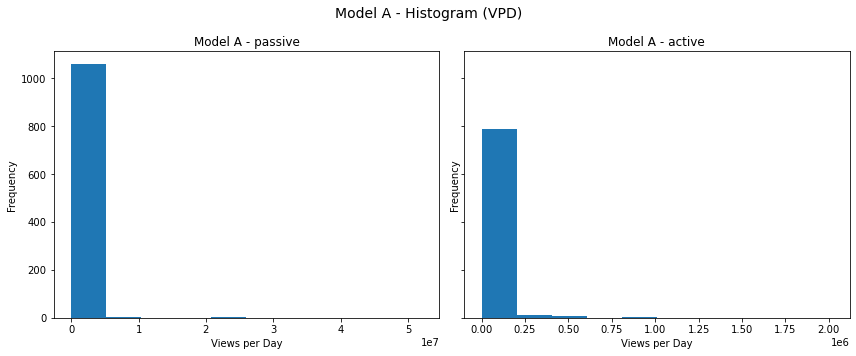

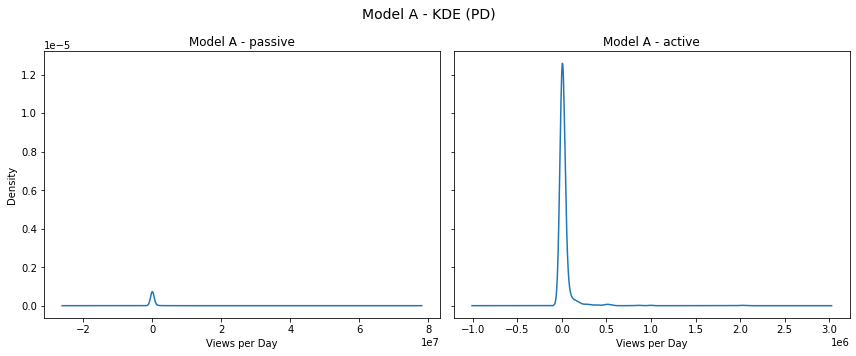

Model A - passive Skewness: 18.384842500659925
Model A - passive Shapiro p-value: 0.0
-----
Model A - active Skewness: 11.734218612189828
Model A - active Shapiro p-value: 0.0
-----


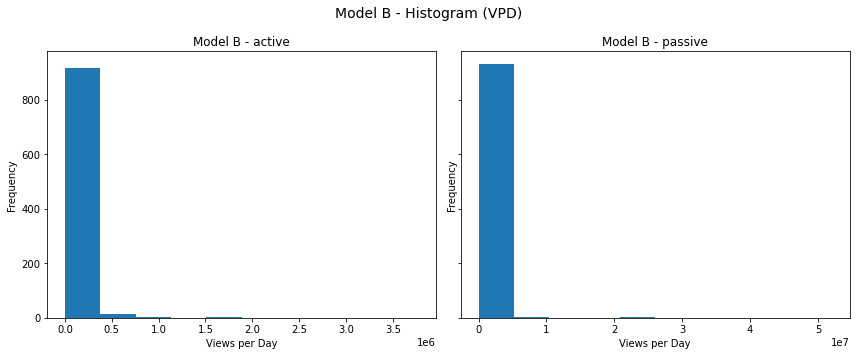

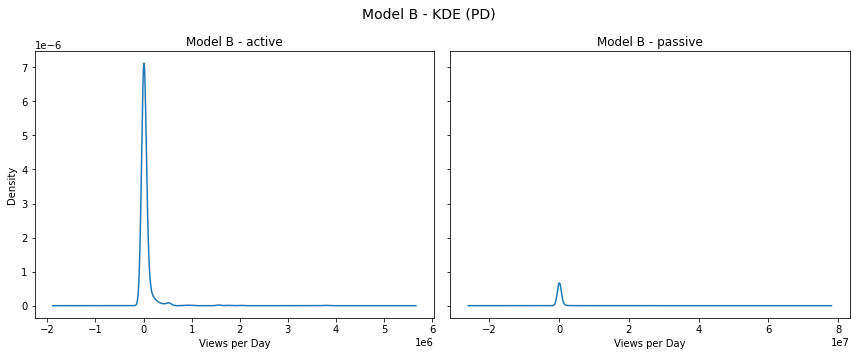

Model B - active Skewness: 11.981272811223143
Model B - active Shapiro p-value: 0.0
-----
Model B - passive Skewness: 17.342308585837625
Model B - passive Shapiro p-value: 0.0
-----


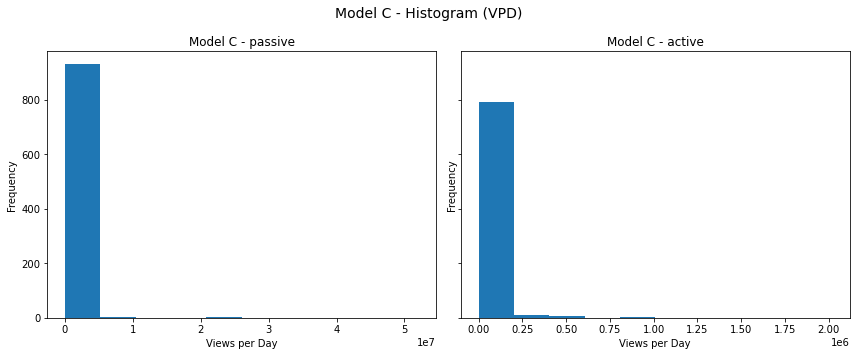

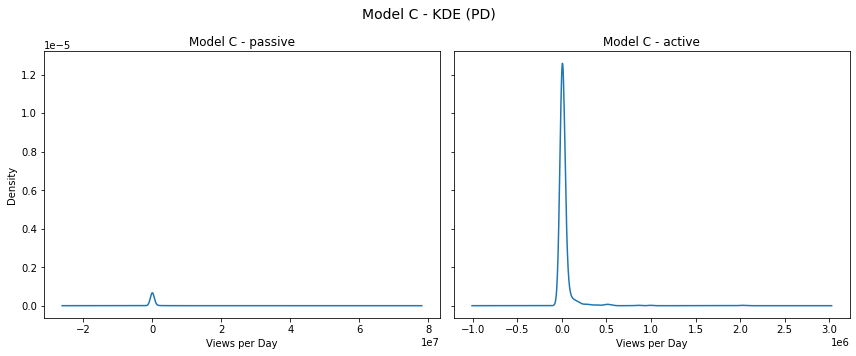

Model C - passive Skewness: 17.342308585837625
Model C - passive Shapiro p-value: 0.0
-----
Model C - active Skewness: 11.734218612189828
Model C - active Shapiro p-value: 0.0
-----


'There is heavy right-skew in all of the groups. And Shapiro p-value is <0.05 for them which indicated non-normality.Therefore, this data is ideal for non-parametric Mann-Whitney U-test.'

In [9]:

# Applying
analyze_distribution(df, "model_A", "Model A")
analyze_distribution(df, "model_B", "Model B")
analyze_distribution(df_C, "model_C", "Model C")


"""There is heavy right-skew in all of the groups. And Shapiro p-value is <0.05 for them which indicated non-normality.Therefore, this data is ideal for non-parametric Mann-Whitney U-test."""



<h3 id="h1-mwu">🧪 1.3 Mann-Whitney U Test</h3>
<div class="info-box">
  <strong><span class="method-badge">Method</span> Mann-Whitney U Test</strong><br/>
  A non-parametric rank-based test comparing two independent groups. Used here because <code>views_per_day</code> is heavily right-skewed (violating normality assumptions required for a t-test).
</div>



In [10]:
def mann_whitney_test(data, label_col, model_name):

    group1 = data[data[label_col] == "active"]["views_per_day"]
    group2 = data[data[label_col] == "passive"]["views_per_day"]

    U, p = mannwhitneyu(group1, group2, alternative='two-sided')

    n1 = len(group1)
    n2 = len(group2)

    rbc = 1 - (2 * U) / (n1 * n2)

    print(f"\n{model_name}")
    print("Mann–Whitney U:", U)
    print("p-value:", p)
    print("Rank-biserial correlation:", rbc)





In [11]:
#Applying the test
mann_whitney_test(df, "model_A", "Model A")
mann_whitney_test(df, "model_B", "Model B")
mann_whitney_test(df_C, "model_C", "Model C")





Model A
Mann–Whitney U: 162307.5
p-value: 3.5306526504648934e-119
Rank-biserial correlation: 0.6246448687069348

Model B
Mann–Whitney U: 214065.5
p-value: 5.203299589401128e-83
Rank-biserial correlation: 0.514437106522358

Model C
Mann–Whitney U: 145831.0
p-value: 1.4777198913117671e-109
Rank-biserial correlation: 0.6160579002726252


<h3 id="h1-ols">📈 1.4 OLS Regression on log(Views/Day) — Robustness Check</h3>
<div class="info-box">
  <strong><span class="method-badge">Method</span> Ordinary Least Squares (OLS)</strong><br/>
  Regressing <code>log(views_per_day + 1)</code> on content type. The log transform reduces the impact of extreme outliers and makes the outcome closer to normally distributed, improving OLS reliability.
</div>


<img src="https://as2.ftcdn.net/v2/jpg/08/29/96/87/1000_F_829968797_Fl3hJecSSvpOboCPm8OXn6c26NTIX2Z7.jpg" 
     alt="Sentiment Analysis Diagram" class="nb-image" style="max-height:320px; object-fit:contain;" />
<p class="img-caption">
<div class="info-box warning">
  <strong>⚠️ Assumptions &amp; Caveats:</strong>
  <ul class="assumption-list">
    <li><strong>Linearity:</strong> Assumes the relationship between the binary category dummy and log-VPD is linear — reasonable for a 2-class comparison.</li>
    <li><strong>Homoscedasticity:</strong> Should be verified with residual plots. Heteroscedasticity (common in view count data) would inflate standard errors.</li>
    <li><strong>Confounders not controlled:</strong> Video age, channel size, topic trends, and seasonality are omitted from Model 1. Coefficient estimates should not be interpreted causally.</li>
    <li><strong>OLS R² is expected to be low</strong> — content type alone is a coarse predictor of performance.</li>
  </ul>
</div>

In [12]:
""" OLS on log(VPD)"""
def run_ols(data, label_col, model_name):

    model = smf.ols(f"log_vpd ~ C({label_col})", data=data).fit()

    print(f"\n{model_name} OLS Results")
    print(model.summary())


In [13]:
#Applying
run_ols(df, "model_A", "Model A")
run_ols(df, "model_B", "Model B")
run_ols(df_C, "model_C", "Model C")


Model A OLS Results
                            OLS Regression Results                            
Dep. Variable:                log_vpd   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     709.6
Date:                Wed, 18 Feb 2026   Prob (F-statistic):          7.28e-133
Time:                        11:23:17   Log-Likelihood:                -3914.5
No. Observations:                1878   AIC:                             7833.
Df Residuals:                    1876   BIC:                             7844.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept

<h3 id="h1-summary">📋 1.5 Summary Statistics</h3>

In [14]:
df.groupby('model_A')['views_per_day'].agg(
    views_per_day='median',
    count='count'
)


views_per_day  count
model_A                      
active          3149.0    809
passive        36638.0   1069

In [15]:
df.groupby('model_A')[['engagement_intensity', 'like_to_view_perc']].median().reset_index()


model_A  engagement_intensity  like_to_view_perc
0   active                  3.11               2.82
1  passive                  3.02               2.62

In [16]:
df.model_A.value_counts(normalize = True)

passive    0.569223
active     0.430777
Name: model_A, dtype: float64

<div class="hypothesis" id="h2">
<div class="label">Hypothesis 2</div>
<h2>💬 Sentiment Quality Drives Longevity</h2>
</div>

<div class="section-card">
<p><strong>Research Question:</strong> Do videos with a higher share of positive comments accumulate more total views over their lifetime?</p>

<img src="https://thumbs.dreamstime.com/b/group-people-talking-thinking-concept-illustration-group-people-talking-thinking-friends-speech-bubbles-vector-189662778.jpg" 
     alt="Sentiment Analysis Diagram" class="nb-image" style="max-height:320px; object-fit:contain;" />
<p class="img-caption">Sentiment analysis classifies comments into positive, neutral, and negative categories.</p>

<p>The primary outcome variable is <strong>all-time view percentile</strong> — a rank-normalised measure of cumulative reach that is robust to the outsized influence of viral outliers.</p>
</div>

<h3 id='h2-data'>🗃️ 2.1 Data Preparation</h3>
<p>Sentiment metrics are loaded from a pre-aggregated comments dataset and merged with the main video dataframe on <code>video_id</code>.</p>

In [17]:
comments_agg = pd.read_csv("C:/Users/debad/Downloads/YouTube Statistics_Kaggle Dataset/comments_aggregated.csv")
comments_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   video_id                 1867 non-null   object 
 1   total_comments_analyzed  1867 non-null   int64  
 2   total_comment_likes      1867 non-null   int64  
 3   avg_comment_likes        1867 non-null   int64  
 4   positive_comments        1867 non-null   int64  
 5   neutral_comments         1867 non-null   int64  
 6   negative_comments        1867 non-null   int64  
 7   avg_sentiment_score      1867 non-null   float64
 8   sentiment_variance       1867 non-null   float64
 9   pct_positive_comment     1867 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 146.0+ KB


In [18]:
df["vpd_percentile"] = df["views_per_day"].rank(pct=True)*100
df["all_time_percentile"] = df["views"].rank(pct=True)*100



In [19]:
comments_agg['pct_positive_comment'].quantile([0.25,0.5, 0.75])

0.25    43.65
0.50    70.00
0.75    88.90
Name: pct_positive_comment, dtype: float64

<AxesSubplot:>

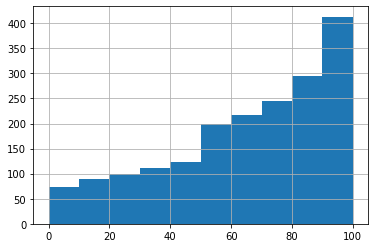

In [20]:
comments_agg['pct_positive_comment'].hist()

In [21]:
videos_comments = df.merge(comments_agg, on="video_id", how="inner")

videos_comments.shape
videos_comments.isnull().sum()



title                        2
video_id                     0
published_at                 0
keyword                      0
likes                        0
comments                     0
views                        0
days_since_publication       0
like_to_view_perc            0
engagement_intensity         0
views_per_day                0
age_cohort                   0
log_vpd                      0
model_A                      0
model_B                      0
model_C                    130
vpd_percentile               0
all_time_percentile          0
total_comments_analyzed      0
total_comment_likes          0
avg_comment_likes            0
positive_comments            0
neutral_comments             0
negative_comments            0
avg_sentiment_score          0
sentiment_variance           0
pct_positive_comment         0
dtype: int64

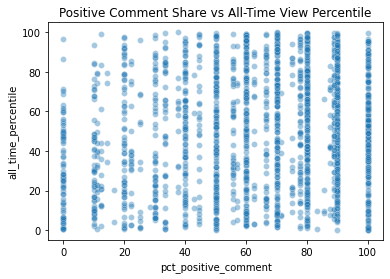

In [22]:
sns.scatterplot(
    data=videos_comments,
    x="pct_positive_comment",
    y="all_time_percentile",
    alpha=0.4
)
plt.title("Positive Comment Share vs All-Time View Percentile")
plt.show()


<h3 id="h2-spearman">🔗 2.2 Primary Test — Spearman Rank Correlation</h3>
<div class="info-box">
  <strong><span class="method-badge">Method</span> Spearman's ρ</strong><br/>
  Measures monotonic association between <em>% positive comments</em> and <em>all-time view percentile</em> without assuming linearity or normality.
</div>
<div class="info-box warning">
  <strong>⚠️ Assumptions &amp; Caveats:</strong>
  <ul class="assumption-list">
    <li><strong>Correlation ≠ Causation:</strong> A positive rho could reflect that popular videos attract more positive comments, not that positivity drives views (reverse causality).</li>
    <li><strong>Only 10 comments sampled per video</strong> in the raw data — sentiment estimates are noisy for videos with large comment sections.</li>
  </ul>
</div>

## Primary test — Spearman Rank Correlation

In [23]:
from scipy.stats import spearmanr, kruskal

rho, pval = spearmanr(
    videos_comments["pct_positive_comment"],
    videos_comments["all_time_percentile"]
)

print(f"Spearman rho: {rho:.3f}")
print(f"P-value: {pval:.3e}")


Spearman rho: 0.140
P-value: 1.072e-09


<h3 id="h2-cohorts">🪣 2.3 Sentiment Cohorts & Kruskal-Wallis Test</h3>
<div class="info-box">
  <strong><span class="method-badge">Method</span> Kruskal-Wallis H-test</strong><br/>
  Non-parametric one-way ANOVA on ranks, comparing all-time percentile across Low / Medium / High sentiment buckets simultaneously. Used instead of pairwise Mann-Whitney to control family-wise error rate.
</div>
<div class="info-box warning">


In [24]:
#Create cohorts
def sentiment_bucket(p):
    if p <50:
        return "Low"
    elif p <75:
        return "Medium"
    else:
        return "High"

videos_comments["sentiment_bucket"] =  videos_comments["pct_positive_comment"].apply(sentiment_bucket)
videos_comments



title     video_id  \
0     Apple Pay Is Killing the Physical Wallet After...  wAZZ-UWGVHI   
1                       The most EXPENSIVE thing I own.  b3x28s61q3c   
2                    My New House Gaming Setup is SICK!  4mgePWWCAmA   
3                    My New House Gaming Setup is SICK!  4mgePWWCAmA   
4     Petrol Vs Liquid Nitrogen | Freezing Experimen...  kXiYSI7H2b0   
5                        Best Back to School Tech 2022!  ErMwWXQxHp0   
6     Brewmaster Answers Beer Questions From Twitter...  18fwz9Itbvo   
7     Tech Monopolies: Last Week Tonight with John O...  jXf04bhcjbg   
8          I bought the STRANGEST TECH on the Internet.  2TqOmtTAMRY   
9     15 Emerging Technologies that Will Change the ...  wLlL46pYcg4   
10    Toxicologist Answers More Poison Questions Fro...  R7qsau3X6Ks   
11          Dope Tech: The Most Extreme Gaming Monitor!  MEiq0oCUb_8   
12                        Cool Tech Under $50 - August!  pT_9hntWj34   
13           Cool Back to School Tech 2022 (Under $100)  cj4lxmHQV0o   
14    Best Tech/EDC Gifts Under $50 for Father&#39;s...  d-BdIo8_wpA   
15                       My Massive Tech Unboxing 47.0!  eFhhW6fsAbQ   
16     Why Millennials Are Leaving Six-Figure Tech Jobs  N88OE2ZCHBM   
17    10 Coolest Gadgets and Inventions That Will Bl...  PKATJiyz0iI   
18              17 Coolest Gadgets You Can Actually Buy  qiMnSaZWf3M   
19       Almost EVERYONE is Wasting Money on Dash Cams.  4AnyhHl3_tE   
20             I bought the THINNEST Tech in the world.  nmY2kgWYwyQ   
21    iPhone 14 Lineup is NOT what you Expected.. (p...  HMqyLcNmsec   
22    Doctor Answers Gut Questions From Twitter | Te...  Q2ysbTVlPdk   
23                          Cool Tech Under $50 - July!  zI8KQq5zmyM   
24    Wolfgang Puck Answers Restaurant Questions Fro...  iEAlq1GPgnc   
25    Battle Of The Tech - Super Bike Vs World Super...  IHnhSxizVOA   
26       OnePlus 10R vs 10T | Unboxing &amp; Comparison  Ql1-RZ2FUrc   
27    Tech Hiring Slowdown: Whats Different This Tim...  Fpof56HU6SY   
28     10 New Tech Gadgets 2022 | You Can Buy Right Now  bbbQ_X45FaA   
29    Taste Expert Answers Questions From Twitter | ...  MtMkU-1p7-0   
30    Audiologist Answers Hearing Questions From Twi...  QYlXL_8ei6g   
31    James Dyson Answers Design Questions From Twit...  zFCFe38EIfE   
32                       My Massive Tech Unboxing 46.0!  LOrkbagIpiY   
33                         Cool Tech Under $50 - April!  UK5OHUmIgcc   
34    15 Emerging Technologies That Will Change Our ...  My2Tr3k1liw   
35    Veterinarian Answers Pet Questions From Twitte...  IUwqf08-FKU   
36    What Is The Best Position For Descending? | GC...  U48UrDpXGog   
37                              My Everyday Tech: 2022!  -pTGc7cIBIA   
38    INVENTIONS OF THE FUTURE THAT WILL SOON BE AVA...  _f8Gb-vojoU   
39    Twitter Whistleblower Accuses Company of Priva...  MAeXrShneoQ   
40    I Did a Terrible Job of This - Intel $5,000 Ex...  AREK4H8k7Ng   
41                          Cool Tech Under $50 - June!  B0HI0RTZdJw   
42         18 DEADLY Tech Fails that need to be BANNED.  Wuq7lS9rljw   
43              I bought the BIGGEST Tech in the world.  VuG4BcghOSg   
44    Neil Gaiman Answers Mythology Questions From T...  o-jUQhCeazQ   
45    Sushi Chef Answers Sushi Questions From Twitte...  -ju6y-pHByw   
46    Futurum Research&#39;s Daniel Newman breaks do...  -VVLmBXHvL8   
47                       My Favorite Tech of the Month!  UxjgqBamqDU   
48    Paleontologist Answers Dinosaur Questions From...  YvZPU-KBCiQ   
49    How Biden&#39;s student loan forgiveness progr...  --ixiTypG8g   
50    Primary results in New York and Florida hold n...  4RkfqEWK2FI   
51    Ex-CIA director predicts what&#39;s next in Ru...  GK8CFuXExLw   
52    President Zelenskyy promises victory over Russ...  95MMQzBkE30   
53    6 months later, what&#39;s next in the Ukraine...  nv7owOSprnI   
54    More than 700 pages of classified documents fo...  rqbFOOt1q9M   
55      Nadler Cel

In [25]:
videos_comments.sentiment_bucket.value_counts(normalize = True)

High      0.422175
Medium    0.311301
Low       0.266525
Name: sentiment_bucket, dtype: float64

In [26]:
videos_comments.groupby('sentiment_bucket')[['engagement_intensity', 'like_to_view_perc']].median().reset_index()


sentiment_bucket  engagement_intensity  like_to_view_perc
0             High                 3.075              2.895
1              Low                 2.995              2.435
2           Medium                 3.120              2.860

In [27]:
#Cohort-wise based on 
groups = (
    videos_comments.groupby("sentiment_bucket")["all_time_percentile"]
      .apply(list)
      .reindex(["Low", "Medium", "High"])
      .tolist()
)



# Kruskal Wallis Test
stat, pval = kruskal(*groups)

print(f"Kruskal–Wallis H: {stat:.2f}")
print(f"P-value: {pval:.3e}")

Kruskal–Wallis H: 41.27
P-value: 1.090e-09


In [28]:
videos_comments.groupby("sentiment_bucket")["all_time_percentile"].median()


sentiment_bucket
High      54.100106
Low       39.563365
Medium    53.274760
Name: all_time_percentile, dtype: float64

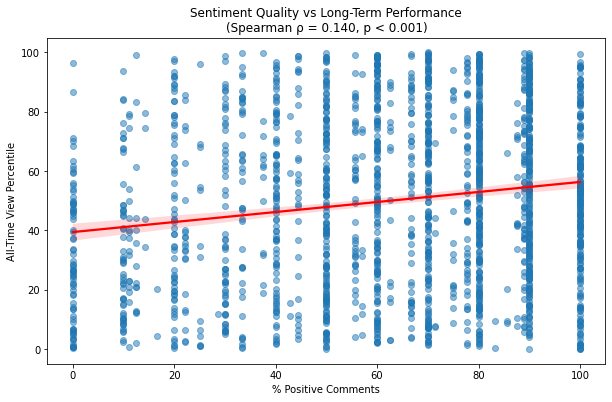

In [29]:

plt.figure(figsize=(10, 6))
sns.regplot(data=videos_comments, 
            x='pct_positive_comment', 
            y='all_time_percentile',
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red'})
plt.xlabel('% Positive Comments')
plt.ylabel('All-Time View Percentile')
plt.title(f'Sentiment Quality vs Long-Term Performance\n(Spearman ρ = {rho:.3f}, p < 0.001)')
plt.show()

In [30]:
# Test within each age cohort
for cohort in ['0-7 days', '8-30 days', '31-90 days', '90+ days']:
    cohort_data = videos_comments[videos_comments['age_cohort'] == cohort]
    rho, p = spearmanr(
        cohort_data['pct_positive_comment'],
        cohort_data['all_time_percentile']
    )
    print(f"{cohort}: ρ = {rho:.3f}, p = {p:.4f}, n = {len(cohort_data)}")

0-7 days: ρ = 0.104, p = 0.0083, n = 644
8-30 days: ρ = 0.181, p = 0.0164, n = 176
31-90 days: ρ = 0.084, p = 0.2822, n = 164
90+ days: ρ = -0.138, p = 0.0000, n = 892


<h3 id='h2-robust'>🛡️ 2.4 Robustness Checks</h3>

## Robustness Checks
1. Alternative sentiment metric — SWES

In [31]:

# Compute SWES
videos_comments["swes"] = (
    2 * videos_comments["positive_comments"]
    + 1 * videos_comments["neutral_comments"]
    - 1 * videos_comments["negative_comments"]
) / videos_comments["total_comments_analyzed"]

# Spearman with SWES
rho_swes, pval_swes = spearmanr(
    videos_comments["swes"],
   videos_comments["all_time_percentile"]
)

print(f"SWES Spearman rho: {rho_swes:.3f}")
print(f"P-value: {pval_swes:.3e}")

# Direction should match % positive.

SWES Spearman rho: 0.103
P-value: 7.887e-06


### 2.Regression with controls (OLS)
 Does the sentiment–longevity relationship survive linear modeling at all?

In [32]:

vc_ols = videos_comments.copy()

# Remove hidden or invalid metrics
vc_ols = vc_ols[
    (vc_ols["likes"] >= 0) &
    (vc_ols["comments"] > 0)
]

model_1 = smf.ols(
    """
    all_time_percentile
    ~ pct_positive_comment
    """,
    data=vc_ols
).fit()

print(model_1.summary())






                             OLS Regression Results                            
Dep. Variable:     all_time_percentile   R-squared:                       0.026
Model:                             OLS   Adj. R-squared:                  0.025
Method:                  Least Squares   F-statistic:                     49.69
Date:                 Wed, 18 Feb 2026   Prob (F-statistic):           2.53e-12
Time:                         11:23:20   Log-Likelihood:                -8898.2
No. Observations:                 1866   AIC:                         1.780e+04
Df Residuals:                     1864   BIC:                         1.781e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             

### Model 2 — Control for scale and context robustness

Does sentiment matter across videos of different ages and content categories?

In [33]:
model_2 = smf.ols(
    """
    all_time_percentile
    ~ pct_positive_comment
    + days_since_publication
    + model_A
    """,
    data=vc_ols
).fit()

print(model_2.summary())

                             OLS Regression Results                            
Dep. Variable:     all_time_percentile   R-squared:                       0.208
Model:                             OLS   Adj. R-squared:                  0.207
Method:                  Least Squares   F-statistic:                     163.4
Date:                 Wed, 18 Feb 2026   Prob (F-statistic):           5.39e-94
Time:                         11:23:20   Log-Likelihood:                -8704.8
No. Observations:                 1866   AIC:                         1.742e+04
Df Residuals:                     1862   BIC:                         1.744e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept         

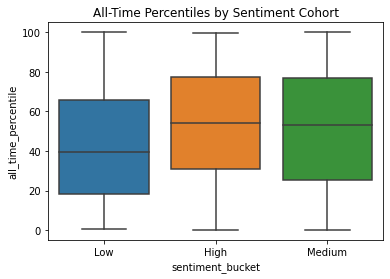

In [34]:
sns.boxplot(
    data=videos_comments,
    x="sentiment_bucket",
    y="all_time_percentile"
)
plt.title("All-Time Percentiles by Sentiment Cohort")
plt.show()


<div class="hypothesis" id="h3">
<div class="label">Hypothesis 3</div>
<h2>⚡ Non-Linear Controversy Effect</h2>
</div>

<div class="section-card">
<p><strong>Research Question:</strong> Does comment controversy have an <strong>inverted-U relationship</strong> with video performance? — moderate controversy boosts reach, while extreme controversy depresses it.</p>
<div class="info-box">
    
  <strong>Comment Controversy Score (CCS)</strong> is a composite metric:<br/>
  <code>CCS = sentiment_variance × avg_comment_likes</code><br/>
  High variance = polarising comments; high likes = amplified engagement. Together they proxy for &ldquo;engaged debate.&rdquo;
</div>
<div class="info-box caveat">
    
   <img src="https://spartanexpressions.org/wp-content/uploads/2024/10/Blue-Pink-Yellow-Pastel-Line-English-Graphic-Novel-Conventions-Presentation.png" 
     alt="Sentiment Analysis Diagram" class="nb-image" style="max-height:320px; object-fit:contain;" />
<p class="img-caption">
 

In [35]:
videos_comments
vc_h3 = videos_comments.copy()

vc_h3["ccs"] = (
   vc_h3["sentiment_variance"] * vc_h3["avg_comment_likes"]
)
vc_h3.describe()

likes       comments         views  days_since_publication  \
count  1.876000e+03    1876.000000  1.876000e+03             1876.000000   
mean   1.615576e+05    7484.878465  9.479748e+06              445.603412   
std    7.025807e+05   34010.089303  5.607872e+07              814.052880   
min   -1.000000e+00      -1.000000  2.500000e+01                0.000000   
25%    2.670750e+03     199.000000  8.432425e+04                1.000000   
50%    1.479350e+04     816.000000  5.896680e+05               70.000000   
75%    6.086350e+04    3376.250000  2.801063e+06              549.750000   
max    1.425903e+07  728774.000000  1.582263e+09             5518.000000   

       like_to_view_perc  engagement_intensity  views_per_day      log_vpd  \
count        1876.000000           1876.000000   1.876000e+03  1876.000000   
mean            3.360101              3.720208   1.674555e+05     9.453215   
std             2.578503              2.867641   1.576163e+06     2.285622   
min            -0.010000              0.010000   0.000000e+00     0.000000   
25%             1.520000              1.747500   3.147250e+03     8.054602   
50%             2.755000              3.040000   1.433950e+04     9.570843   
75%             4.450000              4.860000   5.919075e+04    10.988537   
max            21.860000             26.330000   5.204615e+07    17.767641   

       vpd_percentile  all_time_percentile  total_comments_analyzed  \
count     1876.000000          1876.000000              1876.000000   
mean        50.024808            50.015583                 9.525586   
std         28.889354            28.886722                 1.731554   
min          0.079872             0.053248                 1.000000   
25%         25.013312            25.013312                 9.000000   
50%         50.026624            49.973376                10.000000   
75%         75.039936            75.039936                10.000000   
max        100.000000           100.000000                20.000000   

       total_comment_likes  avg_comment_likes  positive_comments  \
count         1.876000e+03        1876.000000        1876.000000   
mean          1.012584e+04        1036.132729           6.025586   
std           5.057543e+04        5071.101702           2.976241   
min           0.000000e+00           0.000000           0.000000   
25%           1.527500e+02          16.000000           4.000000   
50%           1.015500e+03         108.000000           6.000000   
75%           6.354750e+03         672.000000           8.000000   
max           1.739622e+06      173962.000000          20.000000   

       neutral_comments  negative_comments  avg_sentiment_score  \
count       1876.000000        1876.000000          1876.000000   
mean           2.342751           1.157249             1.500906   
std            2.117434           1.667351             0.417011   
min            0.000000           0.000000             0.000000   
25%            1.000000           0.000000             1.250000   
50%            2.000000           0.000000             1.600000   
75%            3.000000           2.000000             1.800000   
max           14.000000           9.000000             2.000000   

       sentiment_variance  pct_positive_comment         swes            ccs  
count         1876.000000           1876.000000  1876.000000    1876.000000  
mean             0.325091             62.503891     1.376155     427.783390  
std              0.247509             28.107885     0.578548    3030.984137  
min              0.000000              0.000000    -1.000000       0.000000  
25%              0.100000             44.025000     1.100000       1.680000  
50%              0.240000             70.000000     1.500000      19.320000  
75%              0.480000             88.900000     1.800000     173.640000  
max              1.000000            100.000000     2.000000  111335.680000

In [36]:
vc_h3.ccs.describe()

count      1876.000000
mean        427.783390
std        3030.984137
min           0.000000
25%           1.680000
50%          19.320000
75%         173.640000
max      111335.680000
Name: ccs, dtype: float64

In [37]:
vc_h3['ccs'].quantile([0.25,0.5, 0.75,0.80])

0.25      1.68
0.50     19.32
0.75    173.64
0.80    275.00
Name: ccs, dtype: float64

In [38]:
# Controvery Buckets
def controversy_bucket(ccs):
    if ccs < 20:
        return "Low"
    elif ccs <= 200:
        return "Medium"
    else:
        return "High"

vc_h3["ccs_bucket"] = vc_h3["ccs"].apply(controversy_bucket)


#Median Performance by Controversy Buckey
vc_h3.groupby("ccs_bucket")["all_time_percentile"].median()



ccs_bucket
High      79.339723
Low       29.765708
Medium    54.100106
Name: all_time_percentile, dtype: float64

<h3 id="h3-kruskal">🧪 3.1 Kruskal-Wallis & Age-Cohort Tests</h3>
<div class="info-box warning">
 

In [39]:
# Kruskal Wallis Test

groups = [
    vc_h3.loc[vc_h3["ccs_bucket"] == "Low", "all_time_percentile"],
    vc_h3.loc[vc_h3["ccs_bucket"] == "Medium", "all_time_percentile"],
    vc_h3.loc[vc_h3["ccs_bucket"] == "High", "all_time_percentile"]
]

h_stat, p_val = kruskal(*groups)

print(f"Kruskal–Wallis H: {h_stat:.2f}")
print(f"P-value: {p_val:.3e}")


Kruskal–Wallis H: 622.57
P-value: 6.478e-136


In [40]:
# Test within each age cohort
for cohort in ['0-7 days', '8-30 days', '31-90 days', '90+ days']:
    cohort_data = vc_h3[vc_h3['age_cohort'] == cohort]
    rho, p = spearmanr(
        cohort_data['ccs'],
        cohort_data['all_time_percentile']
    )
    print(f"{cohort}: ρ = {rho:.3f}, p = {p:.4f}, n = {len(cohort_data)}")

0-7 days: ρ = 0.395, p = 0.0000, n = 644
8-30 days: ρ = 0.353, p = 0.0000, n = 176
31-90 days: ρ = 0.346, p = 0.0000, n = 164
90+ days: ρ = 0.499, p = 0.0000, n = 892


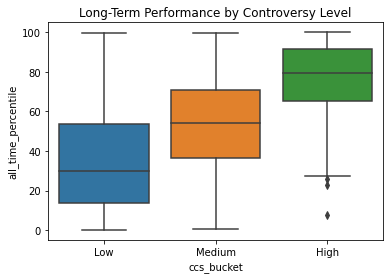

In [41]:
sns.boxplot(
    data=vc_h3,
    x="ccs_bucket",
    y="all_time_percentile",
    order=["Low", "Medium", "High"]
)
plt.title("Long-Term Performance by Controversy Level")
plt.show()


##  Robustness Check 1 — Linear correlation (expected to be weak)

In [42]:

rho, pval = spearmanr(
    vc_h3["ccs"],
    vc_h3["all_time_percentile"]
)

print(f"Spearman rho (CCS vs performance): {rho:.3f}")
print(f"P-value: {pval:.3e}")

Spearman rho (CCS vs performance): 0.545
P-value: 1.688e-145


##  Robustness Check 2 — Quadratic (inverted-U test)



<h3 id='h3-quadratic'>📐 3.2 Quadratic & Interaction Models</h3>

In [43]:
# Prepare quadratic term
vc_h3["ccs_sq"] = vc_h3["ccs"] ** 2


#Quadratic OLS 
quad_model = smf.ols(
    """
    all_time_percentile
    ~ ccs
    + ccs_sq
    """,
    data=vc_h3
).fit()

print(quad_model.summary())


                             OLS Regression Results                            
Dep. Variable:     all_time_percentile   R-squared:                       0.097
Model:                             OLS   Adj. R-squared:                  0.096
Method:                  Least Squares   F-statistic:                     100.1
Date:                 Wed, 18 Feb 2026   Prob (F-statistic):           5.05e-42
Time:                         11:23:21   Log-Likelihood:                -8875.9
No. Observations:                 1876   AIC:                         1.776e+04
Df Residuals:                     1873   BIC:                         1.777e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.6376      0.656     72.59

In [44]:
# videos that are beyond 'PEAK' controversy levels, what's their view percentiles?
vc_h3[vc_h3['ccs'] > 57808]

title     video_id         published_at  \
1286  $456,000 Squid Game In Real Life!  0e3GPea1Tyg  2021-11-24 00:00:00   

      keyword     likes  comments      views  days_since_publication  \
1286  mrbeast  14259033    611757  285526909                     273   

      like_to_view_perc  engagement_intensity  views_per_day age_cohort  \
1286               4.99                  5.21        1045886   90+ days   

        log_vpd  model_A  model_B  model_C  vpd_percentile  \
1286  13.860376  passive  passive  passive       98.136315   

      all_time_percentile  total_comments_analyzed  total_comment_likes  \
1286            99.467519                       10              1739622   

      avg_comment_likes  positive_comments  neutral_comments  \
1286             173962                  8                 0   

      negative_comments  avg_sentiment_score  sentiment_variance  \
1286                  2                  1.6                0.64   

      pct_positive_comment sentiment_bucket  swes        ccs ccs_bucket  \
1286                  80.0             High   1.4  111335.68       High   

            ccs_sq  
1286  1.239563e+10

## Robustness Check 3 — Context-controlled quadratic model


In [45]:
quad_context_model = smf.ols(
    """
    all_time_percentile
    ~ ccs
    + ccs_sq
    + pct_positive_comment
    + model_A
    + days_since_publication
    """,
    data=vc_h3
).fit()

print(quad_context_model.summary())

                             OLS Regression Results                            
Dep. Variable:     all_time_percentile   R-squared:                       0.278
Model:                             OLS   Adj. R-squared:                  0.277
Method:                  Least Squares   F-statistic:                     144.3
Date:                 Wed, 18 Feb 2026   Prob (F-statistic):          9.37e-130
Time:                         11:23:21   Log-Likelihood:                -8665.0
No. Observations:                 1876   AIC:                         1.734e+04
Df Residuals:                     1870   BIC:                         1.738e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept         

## Robustness Check 4 — Interaction with sentiment

This separates fandom debate vs outrage.


In [46]:
vc_h3["ccs_x_sentiment"] = (
    vc_h3["ccs"] * vc_h3["pct_positive_comment"]
)

interaction_model = smf.ols(
    """
    all_time_percentile
    ~ ccs
    + pct_positive_comment
    + ccs_x_sentiment
    + model_A
    + days_since_publication
    """,
    data=vc_h3
).fit()

print(interaction_model.summary())

                             OLS Regression Results                            
Dep. Variable:     all_time_percentile   R-squared:                       0.266
Model:                             OLS   Adj. R-squared:                  0.264
Method:                  Least Squares   F-statistic:                     135.5
Date:                 Wed, 18 Feb 2026   Prob (F-statistic):          8.07e-123
Time:                         11:23:21   Log-Likelihood:                -8681.1
No. Observations:                 1876   AIC:                         1.737e+04
Df Residuals:                     1870   BIC:                         1.741e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept         

##  Robustness Check 5 — Stratification by sentiment

<h3 id='h3-stratification'>🗂️ 3.3 Stratification by Sentiment</h3>

In [74]:
vc_h3.groupby(['ccs_bucket', 'sentiment_bucket'])['all_time_percentile'].median()

ccs_bucket  sentiment_bucket
High        High                83.439830
            Low                 76.411076
            Medium              79.446219
Low         High                41.320554
            Low                 19.435570
            Medium              21.458999
Medium      High                66.560170
            Low                 46.192758
            Medium              47.284345
Name: all_time_percentile, dtype: float64

In [48]:
vc_h3.groupby(['ccs_bucket', 'sentiment_bucket'])['engagement_intensity', 'like_to_view_perc'].median()

C:\Users\debad\AppData\Local\Temp\ipykernel_6524\3841973746.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vc_h3.groupby(['ccs_bucket', 'sentiment_bucket'])['engagement_intensity', 'like_to_view_perc'].median()


engagement_intensity  like_to_view_perc
ccs_bucket sentiment_bucket                                         
High       High                             2.770              2.585
           Low                              3.200              2.890
           Medium                           2.710              2.590
Low        High                             3.170              2.980
           Low                              2.690              2.210
           Medium                           3.560              3.230
Medium     High                             2.970              2.860
           Low                              3.135              2.340
           Medium                           3.150              2.885

In [76]:
vc_h3.groupby(['ccs_bucket', 'sentiment_bucket', 'model_A'])['views'].median().reset_index()

ccs_bucket sentiment_bucket  model_A       views
0        High             High   active   3588950.0
1        High             High  passive  11181957.0
2        High              Low   active   2706505.0
3        High              Low  passive   4238639.0
4        High           Medium   active   2609123.0
5        High           Medium  passive   7376916.5
6         Low             High   active    302531.0
7         Low             High  passive    325309.0
8         Low              Low   active     28899.0
9         Low              Low  passive     66507.0
10        Low           Medium   active     46082.0
11        Low           Medium  passive     77224.5
12     Medium             High   active   1290049.0
13     Medium             High  passive   2322280.0
14     Medium              Low   active    387311.5
15     Medium              Low  passive    468032.5
16     Medium           Medium   active    533712.0
17     Medium           Medium  passive    425073.0

In [49]:
vc_h3.swes.describe()

count    1876.000000
mean        1.376155
std         0.578548
min        -1.000000
25%         1.100000
50%         1.500000
75%         1.800000
max         2.000000
Name: swes, dtype: float64

<AxesSubplot:>

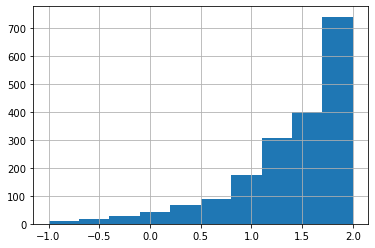

In [50]:
vc_h3.swes.hist()

In [51]:
vc_h3[vc_h3["video_id"] == "-D4S6TpnO44"]

title     video_id  \
241  DON&#39;T USE DOMAIN.COM Before Watch THIS VID...  -D4S6TpnO44   

            published_at   keyword  likes  comments  views  \
241  2022-08-01 00:00:00  business    114         2   2270   

     days_since_publication  like_to_view_perc  engagement_intensity  \
241                      23               5.02                  5.11   

     views_per_day age_cohort  log_vpd model_A model_B model_C  \
241             99  8-30 days  4.60517  active  active  active   

     vpd_percentile  all_time_percentile  total_comments_analyzed  \
241        2.928647             0.798722                        2   

     total_comment_likes  avg_comment_likes  positive_comments  \
241                    1                  1                  1   

     neutral_comments  negative_comments  avg_sentiment_score  \
241                 1                  0                  1.5   

     sentiment_variance  pct_positive_comment sentiment_bucket  swes   ccs  \
241                0.25                  50.0           Medium   1.5  0.25   

    ccs_bucket  ccs_sq  ccs_x_sentiment  
241        Low  0.0625             12.5

<div class="hypothesis" id="spotcheck">
<div class="label">Qualitative Validation</div>
<h2>🔎 Spot-Checking & Video Archetypes</h2>
</div>

<div class="section-card">
<p>We validate model classifications by looking at real examples. Videos are also categorised into performance archetypes based on their VPD percentile vs all-time percentile:</p>
<ul>
  <li><strong>🚀 Rising Stars</strong> — High VPD, low all-time percentile (recent momentum)</li>
  <li><strong>🌲 Evergreen Winners</strong> — High all-time + sustained VPD (90+ day videos)</li>
  <li><strong>🌇 Fading Stars</strong> — High all-time but declining VPD</li>
  <li><strong>🌱 Promising Newcomers</strong> — Low all-time but high VPD (early surge)</li>
</ul>
</div>

## Spot-Checking based on the Analysis criteria. 
1. Active v/s Passive (Comparing Top 5 videos, based on views)

In [52]:
df[df['model_A'] == 'passive'].sort_values('all_time_percentile', ascending = False).sample(5)

title     video_id  \
1610  All Xbox, Nintendo and PlayStation Startups (U...  Hru1FjQUkpI   
815   TROLLING SALTY ADMINS with BANNED CARS... GTA ...  2x-VUP_czUM   
819         TROLLING as an ODER in BROOKHAVEN (JUICY..)  5u0LUssIl58   
40                          Cool Tech Under $50 - June!  B0HI0RTZdJw   
532                This is the End of an Era for Apple.  Byb2W8hTbik   

             published_at   keyword   likes  comments     views  \
1610  2018-11-19 00:00:00      xbox  199933     22438  17069314   
815   2022-08-09 00:00:00  trolling   37296      1088    855392   
819   2022-04-07 00:00:00  trolling   10705       761    639089   
40    2022-06-04 00:00:00      tech   32102      3243    786765   
532   2022-07-27 00:00:00     apple   13488      1181    307938   

      days_since_publication  like_to_view_perc  engagement_intensity  \
1610                    1374               1.17                  1.30   
815                       15               4.36                  4.49   
819                      139               1.68                  1.79   
40                        81               4.08                  4.49   
532                       28               4.38                  4.76   

      views_per_day  age_cohort    log_vpd  model_A  model_B  model_C  \
1610          12423    90+ days   9.427385  passive  passive  passive   
815           57026   8-30 days  10.951280  passive  passive  passive   
819            4598    90+ days   8.433594  passive  passive  passive   
40             9713  31-90 days   9.181323  passive   active     None   
532           10998   8-30 days   9.305560  passive  passive  passive   

      vpd_percentile  all_time_percentile  
1610       47.657082            92.225772  
815        74.334398            55.857295  
819        29.712460            51.650692  
40         42.172524            54.579340  
532        44.834931            41.001065

In [53]:
df[df['model_A'] == 'active'].sort_values('all_time_percentile', ascending = False).sample(5)

title     video_id  \
641   Elon Musk Reveals His Knowledge on Aliens, Cha...  fXS_gkWAIs0   
1385     SCIENCE WARS - Acapella Parody | SCIENCE SONGS  LTXTeAt2mpg   
261   44 Businesses You Can Start During The 2022 Re...  _XzohkDRIg4   
1441  The Mind Bending Story Of Quantum Physics (Par...  ISdBAf-ysI0   
340   William Ackman: Everything You Need to Know Ab...  WEDIj9JBTC8   

             published_at        keyword   likes  comments     views  \
641   2022-08-05 00:00:00      interview  212578     27929  10730641   
1385  2015-12-04 00:00:00  mathchemistry  542855     43802  18496859   
261   2022-07-14 00:00:00       business   22569       859    384275   
1441  2018-03-20 00:00:00        physics   68035      5549   7209027   
340   2012-11-27 00:00:00        finance  213398     13619   9450554   

      days_since_publication  like_to_view_perc  engagement_intensity  \
641                       19               1.98                  2.24   
1385                    2455               2.93                  3.17   
261                       41               5.87                  6.10   
1441                    1618               0.94                  1.02   
340                     3557               2.26                  2.40   

      views_per_day  age_cohort    log_vpd model_A model_B model_C  \
641          564771   8-30 days  13.244177  active  active  active   
1385           7534    90+ days   8.927314  active  active  active   
261            9373  31-90 days   9.145695  active  active  active   
1441           4456    90+ days   8.402231  active  active  active   
340            2657    90+ days   7.885329  active  active  active   

      vpd_percentile  all_time_percentile  
641        96.964856            89.243876  
1385       37.699681            92.758253  
261        41.560170            43.663472  
1441       29.339723            85.303514  
340        23.056443            87.912673

2. Rising Star: High VPD %ile + High cohort %ile (recent)

  Evergreen Winner: High all-time %ile + High VPD (90+ days)

  Fading Star: High all-time + Low VPD


In [54]:
#Rising Stars

#VPD percentile = current momentum
#All-time percentile = cumulative legacy performance. We're trying to see breakout potential. 

rising_stars = df[
    (df["vpd_percentile"] >= 75) &
    (df["all_time_percentile"] > 50) &
    (df["age_cohort"].isin(['0-7 days', '8-30 days']))
].sort_values(['all_time_percentile','vpd_percentile'], ascending = False)


rising_stars.keyword.value_counts(normalize=True).head(5)
#rising_stars.like_to_view_perc.describe()

movies       0.117647
mrbeast      0.102941
cnn          0.095588
minecraft    0.073529
food         0.066176
Name: keyword, dtype: float64

In [55]:
#Evergreen Winner

evergreen_winners= df[
    (df["all_time_percentile"] >= 75) &
    (df["age_cohort"] == "90+ days") &
    (df["vpd_percentile"] >= 50) 
].sort_values(['all_time_percentile','vpd_percentile'], ascending = False)

evergreen_winners.keyword.value_counts(normalize=True).head(5)


mrbeast    0.127854
bed        0.086758
cubes      0.082192
sports     0.068493
animals    0.059361
Name: keyword, dtype: float64

In [56]:
# Fading Stars

fading_stars = df[
    (df["all_time_percentile"] > 75) &
    (df["vpd_percentile"] < 25) 
].sort_values(['all_time_percentile','vpd_percentile'], ascending = False)

fading_stars.keyword.value_counts(normalize=True).head(5)

biology             0.282051
education           0.102564
finance             0.076923
physics             0.076923
computer science    0.076923
Name: keyword, dtype: float64

In [57]:
# Promising Newcomers 

promising_newcomers = df[
    (df["all_time_percentile"] < 25) &
    (df["vpd_percentile"] >75) 
    ]

promising_newcomers.keyword.value_counts(normalize=True).head(5)

news         0.125
gaming       0.100
minecraft    0.100
cnn          0.075
history      0.075
Name: keyword, dtype: float64

<div class="hypothesis" id="combos">
<div class="label">Deep Dive</div>
<h2>🔥 Controversy × Sentiment — Quadrant Analysis</h2>
</div>

<div class="section-card">
<p>We examine the four extreme quadrants of the CCS × Sentiment space to characterise comment culture qualitatively, using raw comment examples.</p>
<table style="width:100%; border-collapse:collapse; font-size:0.9em; margin-top:12px;">
  <tr style="background:#282828; color:white;">
    <th style="padding:10px;">Quadrant</th><th style="padding:10px;">Controversy</th><th style="padding:10px;">Sentiment</th><th style="padding:10px;">Expected Comment Tone</th>
  </tr>
  <tr style="background:#fff8e1;">
    <td style="padding:9px;">🔥 Fandom</td><td>High</td><td>High</td><td>Enthusiastic debate, fan wars, emotional amplification</td>
  </tr>
  <tr style="background:#fce4ec;">
    <td style="padding:9px;">🗣️ Outrage</td><td>High</td><td>Low</td><td>Arguments, strong language, high comment likes</td>
  </tr>
  <tr style="background:#e8f5e9;">
    <td style="padding:9px;">☁️ Calm Positive</td><td>Low</td><td>High</td><td>Calm positivity, fewer long threads</td>
  </tr>
  <tr style="background:#f3f3f3;">
    <td style="padding:9px;">😐 Indifferent</td><td>Low</td><td>Low</td><td>Short comments, mild indifference, low activation</td>
  </tr>
</table>
</div>

## Controversy × Sentiment

### High CCS + Overwhelming Approval

Expect: Fandom tone,Emotional enthusiasm, Comment amplification

In [58]:
df_bucket = vc_h3[
    (vc_h3["ccs_bucket"] == 'High') &
    (vc_h3["sentiment_bucket"] == 'High')
    
].sort_values(['all_time_percentile','vpd_percentile'], ascending = False)

df_bucket.sample(5)

title     video_id  \
869           ASMR Flight Attendant Sleep Care Service  JaqesAupcVA   
713  Where to start with classic literature &amp; t...  RqRLC4vnJEc   
941   US vs India McDonalds | Food Wars | Food Insider  hcsrdPztAmk   
656              Rich Brian - History (Official Video)  6DrNC-xQcGs   
325                          Tutorials That Went WRONG  cHU8kPS9vEY   

            published_at     keyword   likes  comments     views  \
869  2022-08-14 00:00:00        asmr   51772      2918   1075761   
713  2021-03-17 00:00:00  literature   27277       846    507103   
941  2022-07-31 00:00:00        food   48163      2178   1669551   
656  2018-10-10 00:00:00     history  738439     23522  66368842   
325  2021-09-08 00:00:00    tutorial  186142      5329   5646817   

     days_since_publication  like_to_view_perc  engagement_intensity  \
869                      10               4.81                  5.08   
713                     525               5.38                  5.55   
941                      24               2.88                  3.02   
656                    1414               1.11                  1.15   
325                     350               3.30                  3.39   

     views_per_day age_cohort    log_vpd  model_A  model_B  model_C  \
869         107576  8-30 days  11.585962  passive  passive  passive   
713            966   90+ days   6.874198   active   active   active   
941          69565  8-30 days  11.150031  passive  passive  passive   
656          46937   90+ days  10.756583   active   active   active   
325          16134   90+ days   9.688746   active   active   active   

     vpd_percentile  all_time_percentile  total_comments_analyzed  \
869       83.706070            60.223642                       10   
713       12.752929            47.550586                       10   
941       77.635783            67.678381                        9   
656       70.873269            96.964856                       10   
325       52.289670            82.694356                       10   

     total_comment_likes  avg_comment_likes  positive_comments  \
869                12924               1292                  9   
713                13044               1304                  8   
941                10989               1221                  7   
656                22030               2203                  8   
325                15219               1522                  8   

     neutral_comments  negative_comments  avg_sentiment_score  \
869                 0                  1                 1.80   
713                 1                  1                 1.70   
941                 2                  0                 1.78   
656                 2                  0                 1.80   
325                 2                  0                 1.80   

     sentiment_variance  pct_positive_comment sentiment_bucket      swes  \
869                0.36                  90.0             High  1.700000   
713                0.41                  80.0             High  1.600000   
941                0.17                  77.8             High  1.777778   
656                0.16                  80.0             High  1.800000   
325                0.16                  80.0             High  1.800000   

        ccs ccs_bucket       ccs_sq  ccs_x_sentiment  
869  465.12       High  216336.6144        41860.800  
713  534.64       High  285839.9296        42771.200  
941  207.57       High   43085.3049        16148.946  
656  352.48       High  124242.1504        28198.400  
325  243.52       High   59301.9904        19481.600

In [59]:
raw_comments = pd.read_csv("C:/Users/debad/Downloads/YouTube Statistics_Kaggle Dataset/raw_datasets/comments_clean.csv")


In [60]:
pd.set_option('display.max_colwidth', None)
raw_comments[raw_comments["Video ID"] == "WVZTsTXO3Nk"]

Unnamed: 0     Video ID  \
16104       16104  WVZTsTXO3Nk   
16105       16105  WVZTsTXO3Nk   
16106       16106  WVZTsTXO3Nk   
16107       16107  WVZTsTXO3Nk   
16108       16108  WVZTsTXO3Nk   
16109       16109  WVZTsTXO3Nk   
16110       16110  WVZTsTXO3Nk   
16111       16111  WVZTsTXO3Nk   
16112       16112  WVZTsTXO3Nk   
16113       16113  WVZTsTXO3Nk   

                                                                                                                                                                                                                                                              Comment  \
16104                                                                                                                                                                                                 I THOUGHT THIS WAS A SHOW OH MY GOD THAT GAVE ME A HEART ATTACK   
16105                                                                                                                         I love that the heros got the hero track and the villains get Master of Puppets, especially when that riff kicks in is just so much fun   
16106                 This trailer proves there are still directors and writers out there who understand quality and hold themselves to a high standard. This trailer was awesome! This is one of the best pieces of footage that I have seen from Marvel in a while.   
16107                                                                                                                                                                                                                                         LOOK SO AWESOME! 10/10!   
16108                                                                                                                                                                                     This game is definitely giving me Marvel Nemesis vibes and Im all for it!!!   
16109                                                                                                                                                                 If they made an entire movie out of this type of quality, I would pay to go see it in theaters.   
16110                                                                                                                 I respect everyone who were involved in this. Seriously the best piece that I've ever seen on YouTube. HATS OFF TO WELL ALL! LOVE YOUR VIDEOS!!   
16111                                                                                                                                                                                    After seeing good ol' Spidey in this trailer, now I want the game even more.   
16112                                                                                                                                                         Wow they actually got Yuri Lowenthal to voice Peter in this one too. That was actually very unexpected.   
16113  This is awesome, the new design that Marvel give to the armor of Iron man is so cool, the black color is perfect in his armor, also the design of venom is great, and we have ghost rider, i love it. This is a game of marvel that have my attention already.   

         Likes  Sentiment  
16104  34105.0        0.0  
16105    592.0        2.0  
16106    246.0        2.0  
16107     72.0        2.0  
16108     52.0        2.0  
16109   4895.0        2.0  
16110      2.0        2.0  
16111     50.0        2.0  
16112     22.0        2.0  
16113     23.0        2.0

In [61]:
# US vs India McDonalds | Food Wars | Food Insider
raw_comments[raw_comments["Video ID"] == "hcsrdPztAmk"]

Unnamed: 0     Video ID  \
9096        9096  hcsrdPztAmk   
9097        9097  hcsrdPztAmk   
9098        9098  hcsrdPztAmk   
9099        9099  hcsrdPztAmk   
9100        9100  hcsrdPztAmk   
9101        9101  hcsrdPztAmk   
9102        9102  hcsrdPztAmk   
9103        9103  hcsrdPztAmk   
9104        9104  hcsrdPztAmk   
9105        9105  hcsrdPztAmk   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Comment  \
9096                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           The Indian packaging for the fries is so satisfyingly efficient   
9097                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Nikhil had so much energy and was actually trying the food. Makes me want to travel to India just for the McD's food.   
9098                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    I love that basically everything has a vegetarian option in India. Im kind of jealous.   
9099  The thing that was not mentioned in the video is that there are two Mcdonalds in India. North and East zone run by connaught foods and south and west run by Hardcastle foods. The menus for both of them are different meaning each of them

## High CCS + Low Approval

Expect:Comment arguments, Strong language, High comment likes

In [62]:
df_bucket = vc_h3[
    (vc_h3["ccs_bucket"] == 'High') &
    (vc_h3["sentiment_bucket"] == 'Low')
    ].sort_values(['all_time_percentile','vpd_percentile'], ascending = False)

df_bucket.sample(5)

title     video_id  \
1252                              Adults Take The SAT (Again)  PJRhPrLJ4Oo   
161                   The Most Controversial Player in Sports  Kcne0vP4NNE   
1808   I Paid Game Developers on Fiverr to Make the Same Game  I9G6xJTUCHs   
683   Ten Minute History - The Viking Age (Short Documentary)  ExvEIOWB-H0   
1300        I Searched 100 Dumpsters, Here&#39;s What I Found  anFxsa5jXrE   

             published_at           keyword    likes  comments     views  \
1252  2015-05-24 00:00:00               sat    48633      4129   4154143   
161   2021-09-21 00:00:00            sports    51562      8289   4282206   
1808  2021-07-25 00:00:00  game development     5009       325     67619   
683   2019-01-28 00:00:00           history    29974      1394   1453787   
1300  2019-10-12 00:00:00           mrbeast  1572751     52457  91053784   

      days_since_publication  like_to_view_perc  engagement_intensity  \
1252                    2649               1.17                  1.27   
161                      337               1.20                  1.40   
1808                     395               7.41                  7.89   
683                     1304               2.06                  2.16   
1300                    1047               1.73                  1.78   

      views_per_day age_cohort    log_vpd  model_A  model_B  model_C  \
1252           1568   90+ days   7.358194   active   active   active   
161           12707   90+ days   9.449987  passive  passive  passive   
1808            171   90+ days   5.147494   active   active   active   
683            1115   90+ days   7.017506   active   active   active   
1300          86966   90+ days  11.373284  passive  passive  passive   

      vpd_percentile  all_time_percentile  total_comments_analyzed  \
1252       16.853035            79.286475                        9   
161        48.029819            79.605964                        7   
1808        4.339723            22.577210                       10   
683        13.791267            65.282215                        8   
1300       81.576145            97.710330                       10   

      total_comment_likes  avg_comment_likes  positive_comments  \
1252                12685               1409                  3   
161                  9858               1408                  1   
1808                22025               2203                  2   
683                 14831               1854                  3   
1300               118027              11803                  2   

      neutral_comments  negative_comments  avg_sentiment_score  \
1252                 1                  5                 0.78   
161                  3                  3                 0.71   
1808                 6                  2                 1.00   
683                  4                  1                 1.25   
1300                 7                  1                 1.10   

      sentiment_variance  pct_positive_comment sentiment_bucket      swes  \
1252                0.84                  33.3              Low  0.222222   
161                 0.49                  14.3              Low  0.285714   
1808                0.40                  20.0              Low  0.800000   
683                 0.44                  37.5              Low  1.125000   
1300                0.29                  20.0              Low  1.000000   

          ccs ccs_bucket        ccs_sq  ccs_x_sentiment  
1252  1183.56       High  1.400814e+06        39412.548  
161    689.92       High  4.759896e+05         9865.856  
1808   881.20       High  7.765134e+05        17624.000  
683    815.76       High  6.654644e+05        30591.000  
1300  3422.87       High  1.171604e+07        68457.400

In [63]:
# THE MOST SATISFYING FOOD VIDEO COMPILATION | SATISFYING AND TASTY FOOD
raw_comments[raw_comments["Video ID"] == "NLPuCclm5lA"]

Unnamed: 0     Video ID  \
9366        9366  NLPuCclm5lA   
9367        9367  NLPuCclm5lA   
9368        9368  NLPuCclm5lA   
9369        9369  NLPuCclm5lA   
9370        9370  NLPuCclm5lA   
9371        9371  NLPuCclm5lA   
9372        9372  NLPuCclm5lA   
9373        9373  NLPuCclm5lA   
9374        9374  NLPuCclm5lA   
9375        9375  NLPuCclm5lA   

                                                                                                     Comment  \
9366                                                        R.I.P to all those who watched this while hungry   
9367      I mean the fact that I'm hungry and still decided to watch these and make myself even more hungry.   
9368                                                   Yes, I should be asleep right now.Yes, I am starving.   
9369                                          Agony of watching this when you're the only snack in the house   
9370                                 Love this.. It really makes me hungry looking at those delicious dishes   
9371                              I'm just upset because they don't tell me where the hell these places are.   
9372                                            Eyes:satisfied Ears: nice music Stomach:not at all satisfied   
9373  Dios mio! Que deliciaaa! Es increible todo lo que podemos lograr en la cocina. Se me hizo agua la boca   
9374            Yes, I'm starvingYes, I'm sleepyYes, it's my choice if I wanna sleepBut....I'M FASTING DUDE!   
9375                                                                       Incrivel , hummm parece delicioso   

       Likes  Sentiment  
9366  3750.0        1.0  
9367   495.0        0.0  
9368   997.0        0.0  
9369   713.0        1.0  
9370    97.0        2.0  
9371   770.0        0.0  
9372    48.0        1.0  
9373     7.0        2.0  
9374    71.0        0.0  
9375     3.0        2.0

In [64]:
# Eating MEAT in VEGAN Zoom Classes!
raw_comments[raw_comments["Video ID"] == "kkdUBBMNpI4"]

Unnamed: 0     Video ID  \
7946        7946  kkdUBBMNpI4   
7947        7947  kkdUBBMNpI4   
7948        7948  kkdUBBMNpI4   
7949        7949  kkdUBBMNpI4   
7950        7950  kkdUBBMNpI4   
7951        7951  kkdUBBMNpI4   
7952        7952  kkdUBBMNpI4   
7953        7953  kkdUBBMNpI4   
7954        7954  kkdUBBMNpI4   
7955        7955  kkdUBBMNpI4   

                                                                                                                                                        Comment  \
7946                                             I added a couple clips at the end from a video that got taken down, they were too good to be left in the vault   
7947                                                                                                                   Greg is so high, he's on another planet.   
7948                                                                                                           I fell so bad for Randy, he got violated so hard   
7949  Greg: Is that mock meat?Subtrist: No it's real meatGreg: Mm...Greg: **Spends a whole minute trying to remove him from the meeting without saying a word**   
7950                                                                                         7:39 bro I died of laughter like poor Randy didnt even do anything   
7951                                                                                        Greg is legit the definition of the lights are on but nobodies home   
7952                                                        The fact that subtrist didn't even need to troll at first because Greg was enough content as it was   
7953                                                                                                  Greg is absolutely hammered, he would make a great father   
7954                                                                                                               Greg is like the drunk uncle at thanksgiving   
7955                                                                                                    Poor Greg the side effects of being vegan is kicking in   

        Likes  Sentiment  
7946   3060.0        2.0  
7947  13907.0        2.0  
7948   4526.0        0.0  
7949   3095.0        1.0  
7950   1704.0        0.0  
7951    358.0        0.0  
7952     94.0        1.0  
7953     46.0        2.0  
7954      9.0        0.0  
7955      7.0        0.0

## Low CCS + High Approval

Expect: Calm positivity,Less debate,Fewer long comment threads

In [65]:
df_bucket = vc_h3[
    (vc_h3["ccs_bucket"] == 'Low') &
    (vc_h3["sentiment_bucket"] == 'High')
    ].sort_values(['all_time_percentile','vpd_percentile'], ascending = False)

df_bucket.sample(5)

title  \
1736                                                              How I Would Learn Data Science in 2022   
1381                                Greek Alphabet Symbols List - College Math, Chemistry, &amp; Physics   
1601  Xbox Just REVEALED Big Official Updates On Xbox Series X Exclusives, Xbox GamePass And Free Games!   
724                                                                A Day in the Life of a Literature PhD   
1440                                       Taxonomy: Life&#39;s Filing System - Crash Course Biology #19   

         video_id         published_at        keyword  likes  comments  \
1736  Rt6eb9VOFII  2022-02-09 00:00:00   data science   2923        49   
1381  _AWZZP3J5Nw  2019-12-03 00:00:00  mathchemistry   4386       176   
1601  573n5HGVo94  2022-08-20 00:00:00           xbox   3205       439   
724   qg8E-rdG6W4  2016-11-15 00:00:00     literature   3312       178   
1440  F38BmgPcZ_I  2012-06-04 00:00:00        biology  28907      2438   

        views  days_since_publication  like_to_view_perc  \
1736    89486                     196               3.27   
1381   170305                     995               2.58   
1601    84465                       4               3.79   
724     91932                    2108               3.60   
1440  2767666                    3733               1.04   

      engagement_intensity  views_per_day age_cohort   log_vpd  model_A  \
1736                  3.32            457   90+ days  6.126869   active   
1381                  2.68            171   90+ days  5.147494   active   
1601                  4.31          21116   0-7 days  9.957834  passive   
724                   3.80             44   90+ days  3.806662   active   
1440                  1.13            741   90+ days  6.609349   active   

      model_B  model_C  vpd_percentile  all_time_percentile  \
1736   active   active        8.413206            25.931842   
1381   active   active        4.339723            33.546326   
1601  passive  passive       56.602769            25.026624   
724    active   active        1.304579            26.091587   
1440   active   active       11.288605            74.866880   

      total_comments_analyzed  total_comment_likes  avg_comment_likes  \
1736                       10                  145                 15   
1381                        9                   78                  9   
1601                        9                  188                 21   
724                        10                  349                 35   
1440                        9                 2193                244   

      positive_comments  neutral_comments  negative_comments  \
1736                  9                 0                  1   
1381                  8                 1                  0   
1601                  7                 2                  0   
724                   8                 2                  0   
1440                  9                 0                  0   

      avg_sentiment_score  sentiment_variance  pct_positive_comment  \
1736                 1.80                0.36                  90.0   
1381                 1.89                0.10                  88.9   
1601                 1.78                0.17                  77.8   
724                  1.80                0.16                  80.0   
1440                 2.00                0.00                 100.0   

     sentiment_bucket      swes   ccs ccs_bucket   ccs_sq  ccs_x_sentiment  
1736             High  1.700000  5.40        Low  29.1600          486.000  
1381             High  1.888889  0.90        Low   0.8100           80.010  
1601             High  1.777778  3.57        Low  12.7449          277.746  
724              High  1.800000  5.60        Low  31.3600          448.000  
1440             High  2.000000  0.00        Low   0.0000            0.000

In [66]:
# Kirk Douglas, James Coburn Best Western Movies | Full Length | Draw! Full Movie English
raw_comments[raw_comments["Video ID"] == "tq7WVgrrucY"]

Unnamed: 0     Video ID  \
16818       16818  tq7WVgrrucY   
16819       16819  tq7WVgrrucY   
16820       16820  tq7WVgrrucY   
16821       16821  tq7WVgrrucY   
16822       16822  tq7WVgrrucY   
16823       16823  tq7WVgrrucY   
16824       16824  tq7WVgrrucY   
16825       16825  tq7WVgrrucY   
16826       16826  tq7WVgrrucY   
16827       16827  tq7WVgrrucY   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Comment  \
16818   23:23 _Hermosa eleccion_ 18kissx.Uno_los mortales abian apreciado tan hermosa mujer_ 10:10 Hopi:-Sweeter-11:12 Sun:Hotter00:18 aqpt Joonie:Cooler18:00 Yoongy:Butter23:23 Son unos de los mejores conciertos -manas no se la- Las elecciones cinematograficas y artisticas son brillantes. Referencias culturales europeas realmente interesantes. Ojala la cultura europea se representara mas a menudo tan bellamente. No puedo dejar de decir "oh, esto es hermoso" a lo largo del video. Luz, en serio... el que se encargue de la iluminacion, genia   
16819  23:23 Hermosa eleccion 18KISSX.Uno-los mortales abian apreciado tan hermosa mujer- 10:10 Hopi:-Sweeter-11:12 Sun:Hotter18:00 Yoongy:-Butter-00:12 Joonie:Cooler23:21 Son unos de los mejores conciertos manas no se la Las elecciones cinematograficas y artisticas son brillantes. Referencias culturales europeas realmente interesantes. Ojala la cultura europea se representara mas a menudo tan bellamente. No puedo dejar de decir "oh, esto es hermoso" a lo largo del video. Luz, en serio... el que se encargue de la iluminacion, genial lbux..   
16820                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Kirk was the real deal. Born in 1916, died in 2020 at 104 years old. Had an amazing career.   
16821                                                                                                                                                                                                                                                                                                                                                                                                                                                       Two of my all time favorites, so very funny. You know it's good when you don't want the movie to end.   
16822                                                                                                                                                                                                                                                                         23:23 LINDA COMO SEMPRE. 18KISSX.UNOlos mortales apreciaban a una mujer tan hermosa 2:09\/ ( elecciones ) 9:05 /\ 1:03 ( culturales ) 9:13 /\10:10 Hopi:Sweeter11:12 Sun:Hotter00:18 Joonie:Cooler18:00 Yoongy tkrx:Butter23:23 Son unos de los mejores conciertos manas no se layt   
16823                                                                                                                                                                                                                                                                                                                                             

In [67]:
# Biology 1010 Lecture 1 Intro to Biology
raw_comments[raw_comments["Video ID"] == "Q8ijKtdIRMQ"]

Unnamed: 0     Video ID  \
13602       13602  Q8ijKtdIRMQ   
13603       13603  Q8ijKtdIRMQ   
13604       13604  Q8ijKtdIRMQ   
13605       13605  Q8ijKtdIRMQ   
13606       13606  Q8ijKtdIRMQ   
13607       13607  Q8ijKtdIRMQ   
13608       13608  Q8ijKtdIRMQ   
13609       13609  Q8ijKtdIRMQ   
13610       13610  Q8ijKtdIRMQ   
13611       13611  Q8ijKtdIRMQ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Comment  \
13602                                                                                                                                                                                                                                                                                                                 havent been to school in ten years and just re-enrolled in college. I need all the help I can get thanks for the video. its a good warm up lecture before I take my actual bio class   
13603                                                                  Dude, thank you so much for providing this information for free on YouTube. I'm not a biology student ( amateur ), nor do I have anything to do with it, career wise, but I just like to have knowledge, and I watch your videos multiple times, and I still do. It's people like you and Sal khan from khan academy, that make this world a better place. I can learn anything I want, without going broke! Lol thanks once again.   
13604                                                                                                                                                                                                                                                                                                                                    This dude is a very talented teacher :) You can feel his enthusiasm through his words and his teaching is very easy to learn from, ..I find :) it's rare to find!   
13605                                                                                                                                                                                                                                                                                                                                                                                                                                    Wow I think I just learned more here than in my actual bio class.   
13606                                                                                                                                                                                                                                                                                                                                                                                                Just want to say that your videos helped me get an A in my college Bio class, in the past. Thank you!   
13607                                                                                                                                                                                                                                                                                                                                                                                                   This is an excellent lesson and I love how the teacher explains it so it is easy and fun to learn.   
13608                                                                                                                                                                         

## Low CCS + Weak Aproval
Expect: Short comments, Mild complaints or indifference, Little emotional intensity

Just low activation. People don't care enough. 

In [68]:
df_bucket = vc_h3[
    (vc_h3["ccs_bucket"] == 'Low') &
    (vc_h3["sentiment_bucket"] == 'Low')
    ].sort_values(['all_time_percentile','vpd_percentile'], ascending = False)

df_bucket

title  \
1718                                       Lifetime Movies 2022 #LMN Movies | New Lifetime Movies Based On True Story #6   
1721                                                 New Lifetime Movies (2022) #LMN Movies | Based On True Story (2022)   
593                             Top New Comedy Video Amazing Funny Video 2021 Episode 117 By Guys Fun Ltd@CS Bisht Vines   
580                                                              LIFE-SAVING GADGETS and EMERGENCY HACKS YOU SHOULD KNOW   
1719                      Banjaran Hindi Full Movie - Rishi Kapoor - Sridevi - Kulbhushan Kharbanda - 90&#39;s Hit Movie   
453                                                                   Rubik&#39;s cube spinner moves #shorts #rubikscube   
1674                                         AVENGERS Disney Infinity 2.0 Marvel Super Heroes - Superhero Game Videos PC   
155                                                                                    Top 100 Best Sports Bloopers 2020   
211                                                                                 How to Kill Pennywise | NowThis Nerd   
1140                                                                                    50 SCARIEST Animals In The World   
1723                              Kabali | | New Bangla Dubbed Tamil Movie 2022 | Rajinikanth, Radhika Apte | Pa Ranjith   
584                                                                                                       www.google.com   
1713                                                       MY SIN Best Action Movies 2022 Latest Hollywood Action Movies   
457                                                                                           Solve 3x3 rubik&#39;s cube   
931                                                                                                10!2 32 Music Panda !   
1139                                                                         100 Craziest Animal Fights of All Time 2022   
696                                                                                    HUSTLANG Robber - HIS STORY (M/V)   
1744                                                                                      Is Data Science Dying in 2022?   
451                                                   Triangle cube solving challenge #short #viralvideo #cuber #akcuber   
146                                                                                            Impossible Sports Moments   
1214                                                                        I Survived 100 Days as a WARDEN in Minecraft   
1834                                                                                   Machine Learning vs Deep Learning   
1138                                                                            25 Largest Animals Ever Caught On Camera   
692                                                                 What It Was Like to Be a Mental Patient In the 1900s   
1691                                   Please Leave Whatever You Are Doing And Watch This Amazing Movie- Nigerian Movies   
679                                       America Unearthed: Lost Relics of the Bible (S2, E10) | Full Episode | History   
1193                                                                              ASI seran las VOTACIONES MC LIVE 2022!   
1343                           &#39;Hold on a second&#39;: CNN anchor presses GOP lawmaker on comparing Trump to Clinton   
677                                 5 Unexplained Historical Mysteries That Experts Cannot Solve | Weird History Moments   
1643                                                             Marvel Studios&#39; Thor: Love and Thunder : | Official   
72                                                                              Deadly car bomb detonates outside Moscow   
17                                                            10 Coolest Gadgets and Inventions That Will Blow Your Mind   
1357                   

In [69]:
df_bucket.days_since_publication.value_counts(ascending = False)

# Majority of videos are recent uploads, and haven't gotten enough time to garner truly representative reactions from the collective audience.
#It's best to just monitor these closely. 

0       102
1        41
2        12
4         8
5         6
3         5
6         4
13        4
15        3
183       2
22        2
11        2
7         2
12        2
40        1
14        1
113       1
341       1
336       1
3064      1
248       1
35        1
591       1
236       1
581       1
1178      1
26        1
436       1
676       1
1175      1
19        1
24        1
53        1
67        1
47        1
42        1
37        1
8         1
356       1
326       1
258       1
383       1
73        1
221       1
46        1
21        1
38        1
1764      1
146       1
72        1
434       1
632       1
808       1
92        1
1685      1
376       1
604       1
173       1
1671      1
17        1
102       1
579       1
224       1
44        1
Name: days_since_publication, dtype: int64

In [70]:
# New Lifetime Movies (2022) #LMN Movies | Based On True Story (2022)
raw_comments[raw_comments["Video ID"] == "8gj6deh-fWU"]

Unnamed: 0     Video ID    Comment  Likes  Sentiment
16854       16854  8gj6deh-fWU  Zoom zoom    0.0        1.0

In [71]:
# NBanjaran Hindi Full Movie - Rishi Kapoor - Sridevi - Kulbhushan Kharbanda - 90&#39;s Hit Movie
raw_comments[raw_comments["Video ID"] == "y4nYf9j04Nk"]

Unnamed: 0     Video ID  \
16834       16834  y4nYf9j04Nk   
16835       16835  y4nYf9j04Nk   
16836       16836  y4nYf9j04Nk   
16837       16837  y4nYf9j04Nk   
16838       16838  y4nYf9j04Nk   
16839       16839  y4nYf9j04Nk   
16840       16840  y4nYf9j04Nk   
16841       16841  y4nYf9j04Nk   
16842       16842  y4nYf9j04Nk   
16843       16843  y4nYf9j04Nk   

                                                                                                                                                                                                                                                                     Comment  \
16834                                                                                                                                                                                                . http://api.whatsapp.com/send?phone=918097426767&text=Hello_Movies . .   
16835                                                                                                                                                                                                                                                     Legends never die.   
16836                                                                                                                                                                                                                                           They are alive in our hearts   
16837                                                                                                                                                                                                                        We really miss you Rishi sir and shree devi mam   
16838                                                                                                                                                                                                                                                  I miss you Sridevi ji   
16839  The reality of "resurrection" is portrayed in this movie. My most favorite Indian cinema superstar Pran, the theatrical scholar, draws audience in a manner as they see the story unfolding right before their eyes. He was indeed one of the best cinema stars. RIP.   
16840                                                                                                                                                                                                                                               24 15/08/2021 / Miss you   
16841                                                                                                                                                                                                                                               Two legends in one movie   
16842                                                                                                                                                                                 I miss u a both of them legends of bollywood industryRishi sir, Sridevi mam, Pran Sir.   
16843                                                                                                                                                                                           Dil ko chune wali movis 90 ki film bahut achi haiOur singer ki behtrin aawaj   

       Likes  Sentiment  
16834   96.0        1.0  
16835   37.0        1.0  
16836   13.0        2.0  
16837   38.0        1.0  
16838   38.0        1.0  
16839   45.0        2.0  
16840  180.0        1.0  
16841   75.0        2.0  
16842   45.0        1.0  
16843   13.0        2.0